### BUSINESS UNDERSTANDING

#### Overview

Tanzania, a developing country with a population of over 57 million, faces significant challenges in providing clean water to its citizens. The existing water points in the country play a crucial role in meeting the water needs of the population.Only 30.6% of Tanzanian households use Piped water systems with almost 70% of the population using Water wells. However, many of these wells are in dire need of repair, and some have even failed entirely, thus the water crisis.

#### Problem Statement

Water shortage is a serious issue in Tanzania. It is therefore crucial to identify the category in which Water wells in the country are for repair either by the Ministry of Water in Tanzania, NGOs or Private Companies. Using Data from Ministry of Water in Tanzania, we will help categorize the Condition of the Water wells in the country to help them achieve their Goal

#### Objective

To build a classifier model for the water wells in Tanzania

#### Metric of Success

The model to have an accuracy of atleast 70%

#### Business Questions

1 - Who are the top 10 financiers of Water Well repairs in Tanzania

2 - Who are the top 5 Installers of water wells in Tanzania

3 - What is the quality of the Water in Tanzania

4- What is the common water source for Residents

5- What is the water basin from which water wells get water

6- What is the water wells number per region

### DATA UNDERSTANDING

The target variable in this dataset is status_group with the following labels:

*functional - the waterpoint is operational and there are no repairs needed

*functional needs repair - the waterpoint is operational, but needs repairs

*non functional - the waterpoint is not operational

In [72]:
# importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.stats import norm 
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [73]:
# Loading the data sets
training_data = pd.read_csv("train values.csv")
testing_data = pd.read_csv("test values.csv")
training_labels = pd.read_csv("train labels.csv")

#merging the train dataset
train_df = training_data.merge(training_labels, how="inner")
train_df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [74]:
#function to check on the dataset shape, column names 
def check_dataset(data_df):
    
    # Output the shape of the dataset
    print("Shape of dataset:", data_df.shape)
    
    # Output the column names of the dataset
    print("Column names:", list(data_df.columns))
    
    
check_dataset(train_df)

Shape of dataset: (59400, 41)
Column names: ['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


In [75]:
#checking on Summary statistics of the data
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [76]:
#checking datset info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [77]:
#checking value count for status group
train_df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [78]:
#checking value count for top 10 funders 
train_df.funder.value_counts().head(10)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

In [79]:
#checking for value counts for top 10 source
train_df.source.value_counts().head(10)

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

##### Data cleaning

The data set has 42 columns. Not all columns are useful. It is important we drop some columns which are not important for this project. 

In [80]:
#identifying and dropping not useful columns
unusful_columns = ['date_recorded', 'num_private', 'wpt_name', 'construction_year',
                     'subvillage', 'lga','ward', 'public_meeting', 'recorded_by', 'scheme_management',
                     'scheme_name', 'extraction_type', 'extraction_type_group','source_type', 'waterpoint_type_group', 'management', 'id', 'quantity_group']
train_df.drop(columns=unusful_columns, axis=1, inplace=True)
train_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,...,user-group,pay annually,annually,soft,good,enough,spring,groundwater,communal standpipe,functional
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,2,...,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,4,...,user-group,pay per bucket,per bucket,soft,good,enough,dam,surface,communal standpipe multiple,functional
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,...,user-group,never pay,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,1,...,other,never pay,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [81]:
#checking  for missing values
train_df.isnull().sum().sort_values(ascending=False)

installer                3655
funder                   3635
permit                   3056
population                  0
gps_height                  0
longitude                   0
latitude                    0
basin                       0
region                      0
region_code                 0
district_code               0
status_group                0
waterpoint_type             0
extraction_type_class       0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
source                      0
source_class                0
amount_tsh                  0
dtype: int64

from our data set, we have three columns with  missing values :installer, funder and permit

In [82]:
#percentage of missing values
missing_percent = (train_df.isnull().sum() / len(train_df)) * 100
missing_percent.sort_values(ascending=False)

installer                6.153199
funder                   6.119529
permit                   5.144781
population               0.000000
gps_height               0.000000
longitude                0.000000
latitude                 0.000000
basin                    0.000000
region                   0.000000
region_code              0.000000
district_code            0.000000
status_group             0.000000
waterpoint_type          0.000000
extraction_type_class    0.000000
management_group         0.000000
payment                  0.000000
payment_type             0.000000
water_quality            0.000000
quality_group            0.000000
quantity                 0.000000
source                   0.000000
source_class             0.000000
amount_tsh               0.000000
dtype: float64

Since the percentage of missing values is low, we can drop the rows that have missing values

In [83]:
# dropping missing values rows
train_df.dropna(inplace=True)
train_df.isna().sum().sort_values(ascending=False)

status_group             0
population               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
region_code              0
district_code            0
permit                   0
waterpoint_type          0
extraction_type_class    0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_class             0
amount_tsh               0
dtype: int64

No more missing values

In [84]:
# Checking for duplicates
train_df.duplicated().sum()

1182

In [85]:
#dropping the duplicates
train_df.drop_duplicates(inplace=True)

In [86]:
#confirming data frame has no duplicates
train_df.duplicated().sum()

0

In [87]:
train_df.dtypes

amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
region                    object
region_code                int64
district_code              int64
population                 int64
permit                    object
extraction_type_class     object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
status_group              object
dtype: object

The data set has no missing values or duplicates

### Exploratory Analysis

#### Univariate Analysis

In [88]:
train_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,...,user-group,pay annually,annually,soft,good,enough,spring,groundwater,communal standpipe,functional
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,2,...,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,4,...,user-group,pay per bucket,per bucket,soft,good,enough,dam,surface,communal standpipe multiple,functional
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,...,user-group,never pay,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,1,...,other,never pay,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional


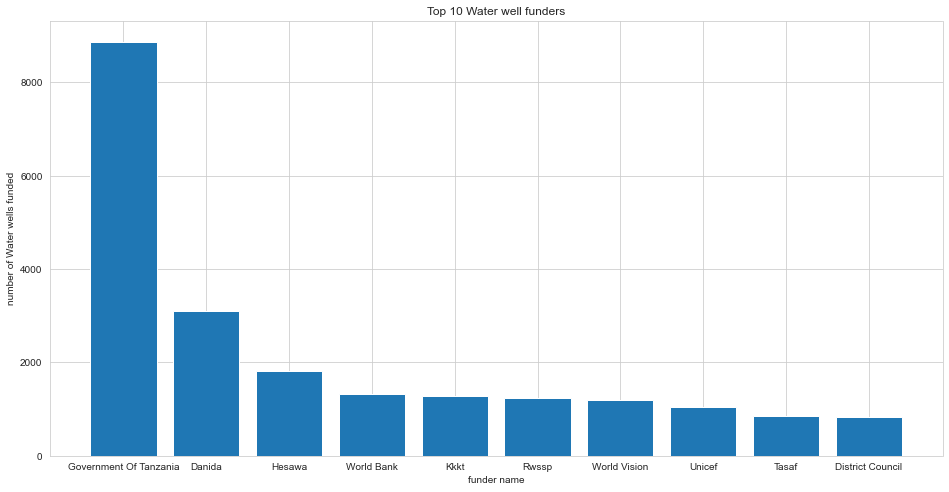

In [89]:
#top 10 Funders 
fig, ax = plt.subplots(figsize=(16,8))
funders_count = train_df["funder"].value_counts().sort_values(ascending=False).head(10)
plt.bar(funders_count.index, funders_count.values)
plt.xlabel("funder name")
plt.ylabel("number of Water wells funded")
plt.title("Top 10 Water well funders")
sns.set_style("whitegrid")
plt.show()


From the visualization, The government of tanzinai is the biggest financier of water wells project with over 8,000 water wells funded followed by Danida, Hesawa and World Bank.

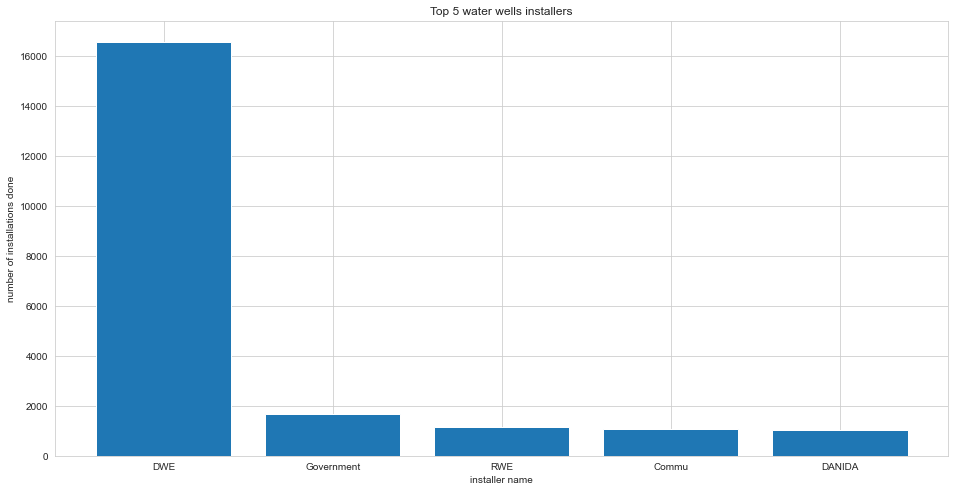

In [90]:
#Top 5 installers of water wells
fig, ax = plt.subplots(figsize=(16,8))
installers_count = train_df["installer"].value_counts().sort_values(ascending=False).head(5)
plt.bar(installers_count.index, installers_count.values)
plt.xlabel("installer name")
plt.ylabel("number of installations done")
plt.title("Top 5 water wells installers")
sns.set_style("whitegrid")
plt.show()

DWE are the most sought after installers for water wells with over 16,000 water wells installed followed by government intsllation, RWE , community installation and DANIDA

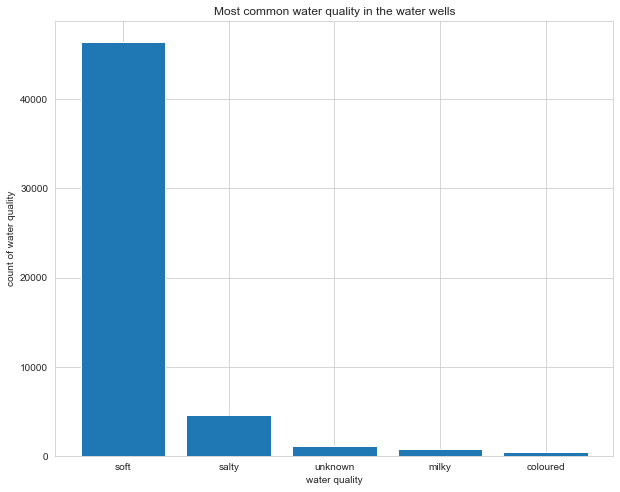

In [91]:
#water quality
fig, ax = plt.subplots(figsize=(10,8))
quality_count = train_df["water_quality"].value_counts().sort_values(ascending=False).head(5)
plt.bar(quality_count.index, quality_count.values)
plt.xlabel("water quality")
plt.ylabel("count of water quality")
plt.title("Most common water quality in the water wells")
sns.set_style("darkgrid")
plt.show()

A major portion of the water in Tanzania is Soft 

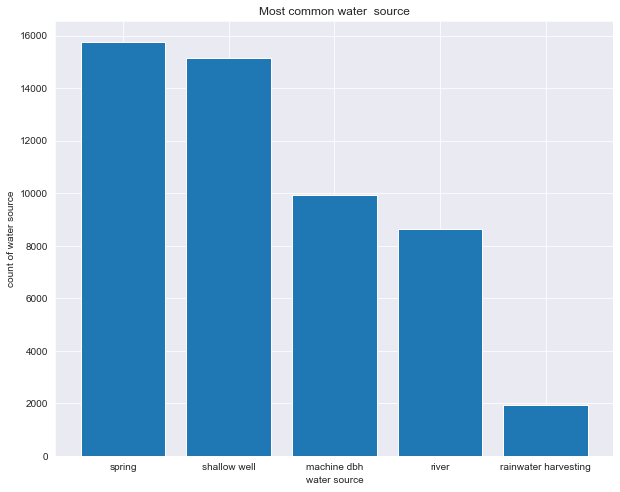

In [92]:
fig, ax = plt.subplots(figsize=(10,8))
source_count = train_df["source"].value_counts().sort_values(ascending=False).head(5)
plt.bar(source_count.index, source_count.values)
plt.xlabel("water source")
plt.ylabel("count of water source")
plt.title("Most common water  source")
sns.set_style("darkgrid")
plt.show()

Spring water is the most common water source followed by Shallow well, machine dbh , river water and rain water harvesting

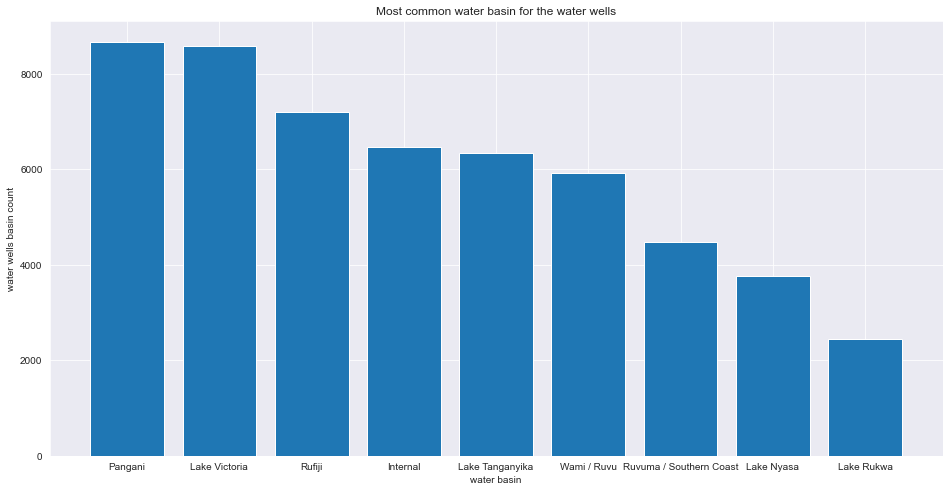

In [93]:
#waterbasin count
fig, ax = plt.subplots(figsize=(16,8))
basin_count = train_df["basin"].value_counts().sort_values(ascending=False).head(10)
plt.bar(basin_count.index, basin_count.values)
plt.xlabel("water basin")
plt.ylabel("water wells basin count")
plt.title("Most common water basin for the water wells")
sns.set_style("darkgrid")
plt.show()

Pangani is the source water basin for most wells followed by Lake Victoria and Rufiji 

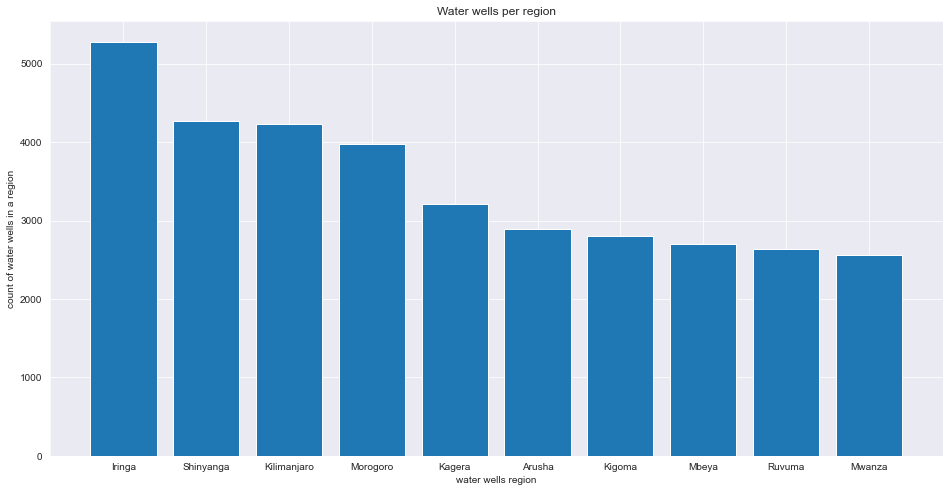

In [94]:
#Waterwells per region
fig, ax = plt.subplots(figsize=(16,8))
region_count = train_df["region"].value_counts().sort_values(ascending=False).head(10)
plt.bar(region_count.index, region_count.values)
plt.xlabel("water wells region")
plt.ylabel("count of water wells in a region")
plt.title("Water wells per region")
sns.set_style("dark")
plt.show()

Iringa region has the most water wells with over 5000 wells followed by shinyanga region with slightly 4000 water wells , kilmanajaro with slightly 4000 water wells and Morogoro region with slighly below 4000 water wells

#### Bivariate analysis

In [95]:
train_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,district_code,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,...,user-group,pay annually,annually,soft,good,enough,spring,groundwater,communal standpipe,functional
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,2,...,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,4,...,user-group,pay per bucket,per bucket,soft,good,enough,dam,surface,communal standpipe multiple,functional
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,...,user-group,never pay,never pay,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,18,1,...,other,never pay,never pay,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional


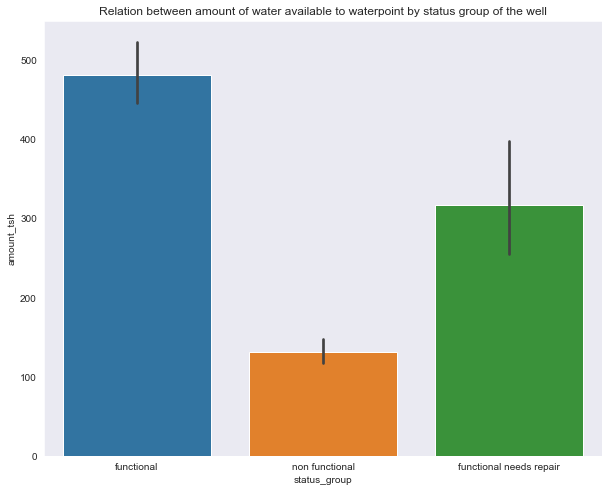

In [96]:
#relationship between amount_tsh and status group
bar, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data = train_df, x= "status_group", y="amount_tsh")
ax.set_title("Relation between amount of water available to waterpoint by status group of the well")
sns.set_style("whitegrid")

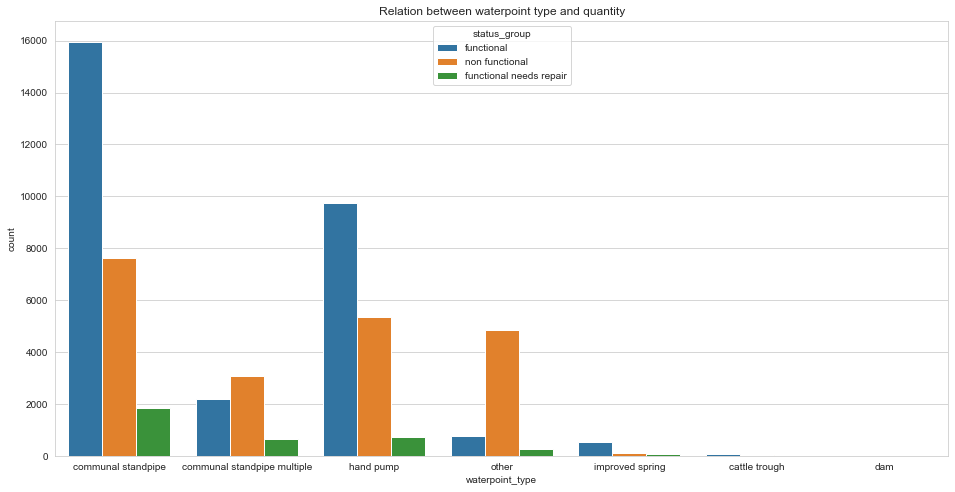

In [97]:
bar, ax = plt.subplots(figsize=(16,8))
ax = sns.countplot(data = train_df, x="waterpoint_type", hue="status_group")
ax.set_title("Relation between waterpoint type and quantity")
sns.set_style("whitegrid")

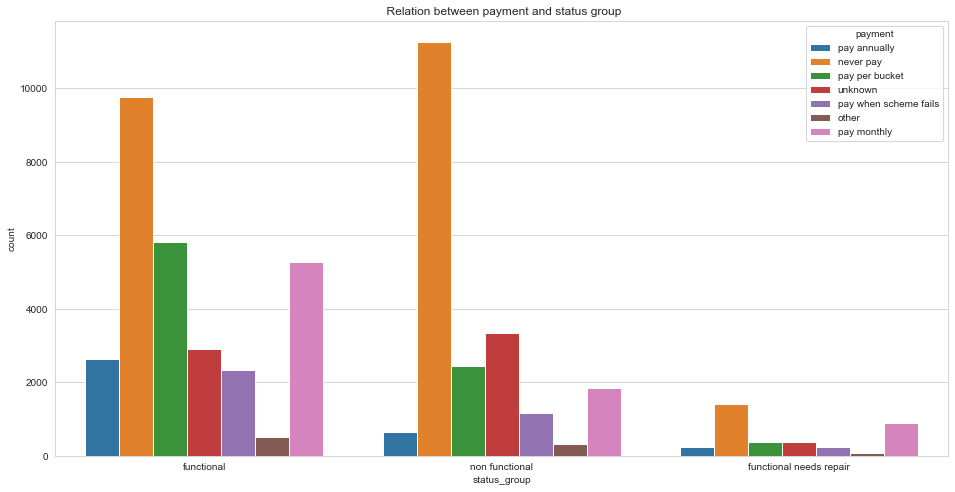

In [98]:
#payment and status group
ax, fig = plt.subplots(figsize=(16,8))
ax = sns.countplot(data=train_df, x="status_group", hue="payment")
ax.set_title(" Relation between payment and status group")
sns.set_style("whitegrid")

### Data Preprocessing

In [99]:
data_df = train_df.copy()
data_df.columns


Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'region_code', 'district_code',
       'population', 'permit', 'extraction_type_class', 'management_group',
       'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity',
       'source', 'source_class', 'waterpoint_type', 'status_group'],
      dtype='object')

In [100]:
#dropping more columns not useful for our model
data_df.drop(columns=['funder', "installer"], axis=1, inplace=True)

#### Encoding categorical columns

In [101]:
#checking data types
data_df.dtypes

amount_tsh               float64
gps_height                 int64
longitude                float64
latitude                 float64
basin                     object
region                    object
region_code                int64
district_code              int64
population                 int64
permit                    object
extraction_type_class     object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
status_group              object
dtype: object

In [102]:
#train test split
X = data_df.drop(columns=['status_group'], axis=1)
y = data_df.status_group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [103]:
#Creating dummy variavles for X_train and X_test
X_train_cat = pd.get_dummies(X_train.select_dtypes(include=["object"]))
X_test_cat = pd.get_dummies(X_test.select_dtypes(include=["object"]))


In [104]:
# Concatenating Numerical values with dummy variables for X_train and X_test
X_train_2 = pd.concat([X_train.select_dtypes(exclude = ["object"]),X_train_cat,],axis = 1)
X_test_2 = pd.concat([X_test.select_dtypes(exclude = ["object"]),X_test_cat],axis = 1)

#### Scaling

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2)
X_test_scaled = scaler.fit_transform(X_test_2)

#### Label encoding

In [106]:
label = LabelEncoder()
y_train_1 = label.fit_transform(y_train)
y_test_1 = label.fit_transform(y_test)

In [107]:
y_test_series = pd.Series(y_test_1)
print(y_test.value_counts())
print("\n")
print(y_test_series.value_counts())

functional                 5880
non functional             4185
functional needs repair     711
Name: status_group, dtype: int64


0    5880
2    4185
1     711
dtype: int64


0 represents functional wells

2 represents non functional wells

1 represents functional needs repair

#### Class imbalance

In [108]:
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train_scaled, y_train_1)

### Modelling

#### Building the base model



In [109]:
randomforest_model = RandomForestClassifier(random_state = 42)
logisticreg_model = LogisticRegression(random_state = 42)
decisiontree_model = DecisionTreeClassifier(random_state = 42)
knn_model = KNeighborsClassifier()

In [110]:
train_accuracy = []
test_accuracy = []
model_list = [randomforest_model,logisticreg_model, decisiontree_model, knn_model]
for i in model_list:
    i = i.fit(X_train_new, y_train_new)
    ytrain_pred = i.predict(X_train_new)
    ytest_pred = i.predict(X_test_scaled)
    train_accuracy.append(accuracy_score(ytrain_pred, y_train_new))
    test_accuracy.append(accuracy_score(ytest_pred, y_test_1))

In [111]:
train_accuracy

[0.9980745368191348,
 0.6306533738393736,
 0.9981030621995921,
 0.8669718882375593]

In [112]:
test_accuracy

[0.6699146250927989,
 0.6302895322939867,
 0.5391610987379362,
 0.7132516703786191]

##### Summary of Models accuracy
Random Forest Model: Train accuracy 0.998, Test accuracy 0.69

Logistic Model : Train accuracy 0.63 , Test accuracy 0.63

Decision Tree Model:Train accuracy 0.998, Test accuracy 0.53

Knn Model :Train accuracy 0.867, Test accuracy 0.716

##### The Decision Tree model was dropped due to Overfitting

#### Model Tuning

We are going to tune the Random forest model, Logistic Model and the KNN model

##### 1- Random forest

In [113]:
# defining parameters
param_grid = {
    "n_estimators" : [200, 300],
    "min_samples_leaf" : [1],
    "max_depth" : [20, 30],
    
}

In [114]:
random_forest = RandomForestClassifier()

#gridsearch to run through the parameters
grid_search1 = GridSearchCV(random_forest, param_grid,cv = 5, n_jobs=-1)
grid_search1.fit(X_train_new, y_train_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30], 'min_samples_leaf': [1],
                         'n_estimators': [200, 300]})

In [115]:
#best parameters
best_parameters1 = grid_search1.best_params_
best_score = grid_search1.best_score_

print (f"The best parameters are {best_parameters1}")
print(f"the best score is {best_score}")

The best parameters are {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 300}
the best score is 0.8552769172042918


In [116]:
best_model1 = RandomForestClassifier(**best_parameters1)
best_model1.fit(X_train_new, y_train_new)
accuracy1 = best_model1.score(X_test_scaled, y_test_1)
print(f"accuracy score of tuned random forest is {accuracy1}")

accuracy score of tuned random forest is 0.6536748329621381


##### 2-Logistic model

In [117]:
#defining parameters
param_grid = {'penalty' : ['l2'],
               'C' :  [0.1],
               'solver' : ['lbfgs','newton-cg']}


In [118]:
log = LogisticRegression()

#grid search through all parameters
grid_search2 = GridSearchCV(log, param_grid, cv=5)
grid_search2.fit(X_train_new, y_train_new)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg']})

In [119]:
best_parameters2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_

print (f"The best parameters are {best_parameters2}")
print(f"the best score is {best_score2}")

The best parameters are {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
the best score is 0.6296263744548366


In [120]:
best_model2 = LogisticRegression(**best_parameters2)
best_model2.fit(X_train_new, y_train_new)
accuracy2 = best_model2.score(X_test_scaled, y_test_1)
print(f"accuracy score of tuned random forest is {accuracy2}")

accuracy score of tuned random forest is 0.6304751299183371


##### 3- KNN Model

In [121]:
param_grid = {
    "n_neighbors" : [5],
    "algorithm" : [ "auto"],
    "weights": ["distance"]
}

In [122]:
knn = KNeighborsClassifier()

#grid search
grid_search3 = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search3.fit(X_train_new, y_train_new)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'n_neighbors': [5],
                         'weights': ['distance']})

In [123]:
best_parameters3 = grid_search3.best_params_
best_score3 = grid_search3.best_score_

print (f"The best parameters are {best_parameters3}")
print(f"the best score is {best_score3}")


The best parameters are {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
the best score is 0.8223586364569494


In [124]:
best_model3 = KNeighborsClassifier(**best_parameters3)
best_model3.fit(X_train_new, y_train_new)
accuracy3 = best_model3.score(X_test_scaled, y_test_1)
print(f"accuracy score of tuned K Neighbors is {accuracy3}")

accuracy score of tuned K Neighbors is 0.7242019302152932


### Evaluation

##### The model with the best performance is the K-nearest and it will be instantiated

In [125]:
# Initializating and fitting
knn_final_model = KNeighborsClassifier(n_neighbors =5 ,algorithm = "auto", weights="distance")
knn_final_model.fit(X_train_new, y_train_new)

KNeighborsClassifier(weights='distance')

In [126]:
#accuracy
preds = knn_final_model.predict(X_test_scaled)
print("accuracy is ", accuracy_score(y_test_1, preds))

accuracy is  0.7242019302152932


### Conclusion

* The best working model was the KNN with an accuracy of 72%



### Recommendations

* The Government of Tanzania, Danida, Hesawa and world bank should be approached for financing of repairs of water wells

* DWE have installed the majority of water wells are best placed for reparing the water wells

* XGboost model can be modelled

### Limitations

* More paramater tuning can be done on the knn model as adding more parameters affected the run time

